
# Homework 4


Some initializations

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
pd.set_option('display.max_columns', 220) # to see all columns 

pd.options.mode.copy_on_write = True # to avoid warnings when replacing values in a column and other commands
# see https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#copy-on-write-chained-assignment


## Joining data



#### Loading data


In [2]:
# ![Upper left corner of the file opened in Jupyter](cleared_cell_phones_total-csv.jpg "'Delimiter' shows the sep parameter value to use")<br><br>

In [3]:
cleaned_cell_phones_total_df = pd.read_csv('cleaned_cell_phones_total.csv', index_col='iso-3')

In [4]:
# cleared_cell_phones_total_data_df = pd.read_csv('cleared_cell_phones_total.csv', index_col='iso-3')

In [5]:
# ![Upper left corner of the file opened in Jupyter](country_data-csv.jpg "'Delimiter' shows the sep parameter value to use")<br><br>

In [6]:
country_data_df = pd.read_csv("country_data.csv", index_col='alpha-3')

In [7]:
# country_data_df = pd.read_csv("https://github.com/su-mt4007/data/country_data.csv", index_col='alpha-3')

In [8]:
# ![Upper left corner of the file opened in Jupyter](pop_data-csv.jpg "'Delimiter' shows the sep parameter value to use")<br><br>

In [9]:
pop_data_df = pd.read_csv('pop_data.csv', index_col='iso-3')

In [10]:
# pop_data_df = pd.read_csv('https://github.com/su-mt4007/data/pop_data.csv', index_col='iso-3')


#### Structure of data


Cell phones

In [11]:
cleaned_cell_phones_total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, ABW to ZWE
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    214 non-null    float64
 1   1965    214 non-null    float64
 2   1966    214 non-null    float64
 3   1967    214 non-null    float64
 4   1968    214 non-null    float64
 5   1969    214 non-null    float64
 6   1970    214 non-null    float64
 7   1971    214 non-null    float64
 8   1972    214 non-null    float64
 9   1973    214 non-null    float64
 10  1974    214 non-null    float64
 11  1975    214 non-null    float64
 12  1976    214 non-null    float64
 13  1977    214 non-null    float64
 14  1978    214 non-null    float64
 15  1979    214 non-null    float64
 16  1980    214 non-null    float64
 17  1981    214 non-null    float64
 18  1982    214 non-null    float64
 19  1983    214 non-null    float64
 20  1984    214 non-null    float64
 21  1985    214 non-null    float64
 22  1986 

In [12]:
cleaned_cell_phones_total_df.index.name

'iso-3'

Countries

In [13]:
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, AFG to ZWE
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   country-code              249 non-null    int64  
 3   iso_3166-2                249 non-null    object 
 4   region                    248 non-null    object 
 5   sub-region                248 non-null    object 
 6   intermediate-region       107 non-null    object 
 7   region-code               248 non-null    float64
 8   sub-region-code           248 non-null    float64
 9   intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 21.4+ KB


In [14]:
country_data_df.index.name

'alpha-3'

In [15]:
print(country_data_df.duplicated().sum()) # are there any duplicates

0


Some more data

In [16]:
country_data_df.head()

,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
alpha-3,,,,,,,,,,
AFG,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
ALA,Åland Islands,AX,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
ALB,Albania,AL,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
DZA,Algeria,DZ,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
ASM,American Samoa,AS,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


Populations

In [17]:
pop_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, ABW to ZWE
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  266 non-null    int64  
 1   1960        264 non-null    float64
 2   1961        264 non-null    float64
 3   1962        264 non-null    float64
 4   1963        264 non-null    float64
 5   1964        264 non-null    float64
 6   1965        264 non-null    float64
 7   1966        264 non-null    float64
 8   1967        264 non-null    float64
 9   1968        264 non-null    float64
 10  1969        264 non-null    float64
 11  1970        264 non-null    float64
 12  1971        264 non-null    float64
 13  1972        264 non-null    float64
 14  1973        264 non-null    float64
 15  1974        264 non-null    float64
 16  1975        264 non-null    float64
 17  1976        264 non-null    float64
 18  1977        264 non-null    float64
 19  1978        264 non-null    floa

In [18]:
pop_data_df.index.name

'iso-3'

In [19]:
print(pop_data_df.duplicated().sum())

0


Some more data

In [20]:
pop_data_df.tail()

,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
iso-3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
XKX,261,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
YEM,262,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,6673981.0,6843607.0,7024196.0,7215835.0,7417736.0,7630190.0,7855657.0,8094985.0,8348182.0,8615301.0,8899922.0,9204938.0,9529105.0,9872292.0,10237391.0,10625687.0,11036918.0,11465444.0,11915563.0,12387238.0,12872362.0,13375121.0,13895851.0,14433771.0,14988047.0,15553171.0,16103339.0,16614326.0,17108681.0,17608133.0,18114552.0,18628700.0,19143457.0,19660653.0,20188799.0,20733406.0,21320671.0,21966298.0,22641538.0,23329004.0,24029589.0,24743946.0,25475610.0,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0
ZAF,263,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,21704214.0,22368306.0,23031441.0,23698507.0,24382513.0,25077016.0,25777964.0,26480300.0,27199838.0,27943445.0,28697014.0,29463549.0,30232561.0,31022417.0,31865176.0,32768207.0,33752964.0,34877834.0,36119333.0,37393853.0,38668684.0,39877570.0,40910959.0,41760755.0,42525440.0,43267982.0,43986084.0,44661603.0,45285048.0,45852166.0,46364681.0,46813266.0,47229714.0,47661514.0,48104048.0,48556071.0,49017147.0,49491756.0,49996094.0,50565812.0,51170779.0,51784921.0,52443325.0,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0
ZMB,264,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,4029173.0,4159007.0,4281671.0,4399919.0,4523581.0,4653289.0,4789038.0,4931249.0,5079672.0,5233292.0,5391355.0,5553462.0,5720438.0,5897481.0,6090818.0,6291070.0,6488072.0,6686449.0,6890967.0,7095185.0,7294325.0,7491275.0,7686401.0,7880466.0,8074337.0,8270917.0,8474216.0,8684135.0,8902019.0,9133156.0,9372430.0,9621238.0,9891136.0,10191964.0,10508294.0,10837973.0,11188040.0,11564870.0,11971567.0,12402073.0,12852966.0,13318087.0,13792086.0,14265814.0,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0
ZWE,265,3806310.0,3925952.0,4049778.0,4177931.0,4310332.0,4447149.0,4588529.0,4734694.0,4886347.0,5044163.0,5202918.0,5363423.0,5532842.0,5712712.0,5903530.0,6097083.0,6288387.0,6453044.0,6549349.0,6655833.0,7049926.0,7506526.0,7803855.0,8106356.0,8398567.0,8690515.0,8983044.0,9277488.0,9568739.0,9846346.0,10113893.0,10377815.0,10641501.0,10794918.0,10858594.0,10994041.0,11178171.0,11362401.0,11548364.0,11716454.0,11834676.0,11910978.0,11984644.0,12075828.0,12160881.0,12224753.0,12330490.0,12450568.0,12550347.0,12679810.0,12839771.0,13025785.0,13265331.0,13555422.0,13855753.0,14154937.0,14452704.0,14751101.0,15052184.0,15354608.0,15669666.0



#### Cleaning data


We know that the data in **cleaned_cell_phones_total_df** is cleaned already.

In **country_data_df** there are many null values. To save a lot of work and time, it would be good to only clean data that will be needed to solve the assignment.

It seems that only the index **alpha-3** and **name** column will be used. The column has no null values, but its Dtype is object. Converting this to Dtype string would be beneficial.

First, make a deep copy of country_data_df.

In [21]:
name_strings_country_data_df = country_data_df.copy()

Now, convert the values in the name column to strings.

In [22]:
name_strings_country_data_df['name'] = country_data_df['name'].astype("string")

In [23]:
name_strings_country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, AFG to ZWE
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    string 
 1   alpha-2                   248 non-null    object 
 2   country-code              249 non-null    int64  
 3   iso_3166-2                249 non-null    object 
 4   region                    248 non-null    object 
 5   sub-region                248 non-null    object 
 6   intermediate-region       107 non-null    object 
 7   region-code               248 non-null    float64
 8   sub-region-code           248 non-null    float64
 9   intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(5), string(1)
memory usage: 21.4+ KB


In **pop_data_df** there is a column we don´t need, so we drop it.

In [24]:
# pop_data_df.columns

In [25]:
dropped_pop_data_df = pop_data_df.drop(columns='Unnamed: 0')

In [26]:
# dropped_pop_data_df.info()


#### Merge dataframes


To create the first table in the assignment we can join, merge, cleaned_cell_phones_total_df and pop_data_df. Since there are fewer countries 
in cleaned_cell_phones_total_df, 214, than in pop_data_df, 266, we will make an inner join that only includes the countries where we have data 
both on the number of cellphones and the sizes of the populations. 

There are also fewer years in cleaned_cell_phones_total_df, 56, than in dropped_pop_data_df, 61, which also motivates an inner join.

For every year in pop_data_df there is one or two countries that have no value. It is first after the join that we can find out if some of the
included countries is affected by missing values.

To get the right format for the first table we have to make multi-indices, 'iso-3' and 'year', on both dataframes.

In [27]:
stacked_cleaned_cell_phones_total_df = cleaned_cell_phones_total_df.stack()

In [28]:
stacked_cleaned_cell_phones_total_df.info()

<class 'pandas.core.series.Series'>
MultiIndex: 11984 entries, ('ABW', '1960') to ('ZWE', '2019')
Series name: None
Non-Null Count  Dtype  
--------------  -----  
11984 non-null  float64
dtypes: float64(1)
memory usage: 141.1+ KB


In [29]:
# stacked_cleaned_cell_phones_total_df.index.names

In [30]:
stacked_cleaned_cell_phones_total_df.index.names = ['iso-3', 'year']

In [31]:
# stacked_cleaned_cell_phones_total_df.columns.name = ['n_cellphones']

In [32]:
stacked_cleaned_cell_phones_total_df.head()

iso-3  year
ABW    1960    0.0
       1965    0.0
       1966    0.0
       1967    0.0
       1968    0.0
dtype: float64

In [33]:
stacked_cleaned_cell_phones_total_df.tail()

iso-3  year
ZWE    2015    12800000.0
       2016    12900000.0
       2017    14100000.0
       2018    12900000.0
       2019    13200000.0
dtype: float64

In [34]:
stacked_dropped_pop_data_df = dropped_pop_data_df.stack()

In [35]:
stacked_dropped_pop_data_df.info()

<class 'pandas.core.series.Series'>
MultiIndex: 16135 entries, ('ABW', '1960') to ('ZWE', '2020')
Series name: None
Non-Null Count  Dtype  
--------------  -----  
16135 non-null  float64
dtypes: float64(1)
memory usage: 186.1+ KB


In [36]:
stacked_dropped_pop_data_df.index.names = ['iso-3', 'year']

In [37]:
stacked_dropped_pop_data_df.index.names

FrozenList(['iso-3', 'year'])

In [38]:
stacked_dropped_pop_data_df.head()

iso-3  year
ABW    1960    54608.0
       1961    55811.0
       1962    56682.0
       1963    57475.0
       1964    58178.0
dtype: float64

In [39]:
stacked_dropped_pop_data_df.tail()

iso-3  year
ZWE    2016    14452704.0
       2017    14751101.0
       2018    15052184.0
       2019    15354608.0
       2020    15669666.0
dtype: float64

Now we can merge the two series to a dataframe. They must be named to be able to merge.

In [40]:
stacked_cleaned_cell_phones_total_df.name = 'n_cellphones'

In [41]:
stacked_cleaned_cell_phones_total_df.info()

<class 'pandas.core.series.Series'>
MultiIndex: 11984 entries, ('ABW', '1960') to ('ZWE', '2019')
Series name: n_cellphones
Non-Null Count  Dtype  
--------------  -----  
11984 non-null  float64
dtypes: float64(1)
memory usage: 141.1+ KB


In [42]:
stacked_dropped_pop_data_df.name = 'population'

In [43]:
stacked_dropped_pop_data_df.info()

<class 'pandas.core.series.Series'>
MultiIndex: 16135 entries, ('ABW', '1960') to ('ZWE', '2020')
Series name: population
Non-Null Count  Dtype  
--------------  -----  
16135 non-null  float64
dtypes: float64(1)
memory usage: 186.1+ KB


In [44]:
# table_1 = stacked_cleaned_cell_phones_total_df.merge(stacked_dropped_pop_data_df, how='inner', on=['iso-3', 'year'], )

In [45]:
table_1 = pd.merge(left=stacked_cleaned_cell_phones_total_df, right=stacked_dropped_pop_data_df, how='inner', on=['iso-3', 'year'])

In [46]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11958 entries, ('ABW', '1960') to ('ZWE', '2019')
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n_cellphones  11958 non-null  float64
 1   population    11958 non-null  float64
dtypes: float64(2)
memory usage: 234.2+ KB


In [47]:
table_1.head()

n_cellphones  population
iso-3 year                          
ABW   1960           0.0     54608.0
      1965           0.0     58782.0
      1966           0.0     59291.0
      1967           0.0     59522.0
      1968           0.0     59471.0

In [48]:
table_1.tail()

n_cellphones  population
iso-3 year                          
ZWE   2015    12800000.0  14154937.0
      2016    12900000.0  14452704.0
      2017    14100000.0  14751101.0
      2018    12900000.0  15052184.0
      2019    13200000.0  15354608.0

In [49]:
resetted_table_1 = table_1.reset_index()

In [50]:
resetted_table_1.head()

,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
1,ABW,1965,0.0,58782.0
2,ABW,1966,0.0,59291.0
3,ABW,1967,0.0,59522.0
4,ABW,1968,0.0,59471.0


In [51]:
sorted_resetted_table_1 = resetted_table_1.sort_values(by=['year', 'iso-3'])

In [52]:
sorted_resetted_table_1.head()

,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
56,AFG,1960,0.0,8622466.0
112,AGO,1960,0.0,5357195.0
168,ALB,1960,0.0,1608800.0
224,AND,1960,0.0,9443.0


In [53]:
sorted_resetted_table_1.tail()

,iso-3,year,n_cellphones,population
11733,XKX,2019,562000.0,1788878.0
11789,YEM,2019,15300000.0,31546691.0
11845,ZAF,2019,97000000.0,58087055.0
11901,ZMB,2019,17200000.0,18380477.0
11957,ZWE,2019,13200000.0,15354608.0


In [54]:
def scientific_float_2_decimals(x):
    if type(x) == float:        
        return '{:.6g}'.format(x)
    else:
        return x
    # return '{:.2e}'.format(x)

In [55]:
test_variable = 2.34

In [56]:
type(test_variable)

float

In [57]:
test_variable.is_integer()

False

In [58]:
# table = sorted_resetted_table_1[['n_cellphones', 'population']].map(scientific_float_2_decimals)

In [59]:
table = sorted_resetted_table_1.map(scientific_float_2_decimals)

In [60]:
table.head()

,iso-3,year,n_cellphones,population
0,ABW,1960,0,54608
56,AFG,1960,0,8.62247e+06
112,AGO,1960,0,5.3572e+06
168,ALB,1960,0,1.6088e+06
224,AND,1960,0,9443


In [61]:
styled_table  = table.iloc[:5,:].style\
                        .hide(axis='index')


#### The first table


In [62]:
styled_table

iso-3,year,n_cellphones,population
ABW,1960,0,54608
AFG,1960,0,8.62247e+06
AGO,1960,0,5.3572e+06
ALB,1960,0,1.6088e+06
AND,1960,0,9443


In [63]:
styled_sorted_resetted_table_3 = sorted_resetted_table_1.iloc[:5,:].style\
                         .hide(axis='index')

In [64]:
styled_sorted_resetted_table_3

iso-3,year,n_cellphones,population
ABW,1960,0.000000,54608.000000
AFG,1960,0.000000,8622466.000000
AGO,1960,0.000000,5357195.000000
ALB,1960,0.000000,1608800.000000
AND,1960,0.000000,9443.000000


In [65]:
styled_sorted_resetted_table_1 = sorted_resetted_table_1.iloc[:10,:].style\
                        .hide(axis='index')

In [66]:
styled_sorted_resetted_table_1

iso-3,year,n_cellphones,population
ABW,1960,0.000000,54608.000000
AFG,1960,0.000000,8622466.000000
AGO,1960,0.000000,5357195.000000
ALB,1960,0.000000,1608800.000000
AND,1960,0.000000,9443.000000
ARE,1960,0.000000,133426.000000
ARG,1960,0.000000,20349744.000000
ARM,1960,0.000000,1904148.000000
ASM,1960,0.000000,20085.000000
ATG,1960,0.000000,55342.000000


In [67]:
styled_sorted_resetted_table_2 = sorted_resetted_table_1.iloc[-10:,:].style\
                        .hide(axis='index')

In [68]:
styled_sorted_resetted_table_2

iso-3,year,n_cellphones,population
VGB,2019,40000.000000,30610.000000
VIR,2019,80300.000000,106669.000000
VNM,2019,136000000.000000,95776716.000000
VUT,2019,265000.000000,304404.000000
WSM,2019,124000.000000,211905.000000
XKX,2019,562000.000000,1788878.000000
YEM,2019,15300000.000000,31546691.000000
ZAF,2019,97000000.000000,58087055.000000
ZMB,2019,17200000.000000,18380477.000000
ZWE,2019,13200000.000000,15354608.000000


Now we can start creating the second table. First we make a copy of the first table.

In [69]:
second_table = sorted_resetted_table_1.copy()

In [70]:
second_table['phones_per_capita'] = second_table['n_cellphones'] / second_table['population'] # compute new column

In [71]:
second_table.head()

,iso-3,year,n_cellphones,population,phones_per_capita
0,ABW,1960,0.0,54608.0,0.0
56,AFG,1960,0.0,8622466.0,0.0
112,AGO,1960,0.0,5357195.0,0.0
168,ALB,1960,0.0,1608800.0,0.0
224,AND,1960,0.0,9443.0,0.0


In [72]:
second_table.tail()

,iso-3,year,n_cellphones,population,phones_per_capita
11733,XKX,2019,562000.0,1788878.0,0.314163
11789,YEM,2019,15300000.0,31546691.0,0.484995
11845,ZAF,2019,97000000.0,58087055.0,1.669907
11901,ZMB,2019,17200000.0,18380477.0,0.935775
11957,ZWE,2019,13200000.0,15354608.0,0.859677


In [73]:
reduced_second_table = second_table.copy() # to drop not needed columns

In [74]:
reduced_second_table = second_table.drop(columns=['n_cellphones', 'population'])

In [75]:
second_table.tail()

,iso-3,year,n_cellphones,population,phones_per_capita
11733,XKX,2019,562000.0,1788878.0,0.314163
11789,YEM,2019,15300000.0,31546691.0,0.484995
11845,ZAF,2019,97000000.0,58087055.0,1.669907
11901,ZMB,2019,17200000.0,18380477.0,0.935775
11957,ZWE,2019,13200000.0,15354608.0,0.859677


In [76]:
reduced_second_table.tail()

,iso-3,year,phones_per_capita
11733,XKX,2019,0.314163
11789,YEM,2019,0.484995
11845,ZAF,2019,1.669907
11901,ZMB,2019,0.935775
11957,ZWE,2019,0.859677


In [77]:
indexed_reduced_second_table = reduced_second_table.set_index('iso-3') # make country code to index

In [78]:
indexed_reduced_second_table.tail()

,year,phones_per_capita
iso-3,,
XKX,2019,0.314163
YEM,2019,0.484995
ZAF,2019,1.669907
ZMB,2019,0.935775
ZWE,2019,0.859677


Now we can prepare the dataframe with country names for merging.

In [79]:
reduced_name_strings_country_data_df = name_strings_country_data_df['name'].copy()

In [80]:
type(reduced_name_strings_country_data_df)

pandas.core.series.Series

In [81]:
reduced_name_strings_country_data_df.head()

alpha-3
AFG       Afghanistan
ALA     Åland Islands
ALB           Albania
DZA           Algeria
ASM    American Samoa
Name: name, dtype: string

Merge dataframe with Series

In [82]:
merged_second_table_df = indexed_reduced_second_table.merge(reduced_name_strings_country_data_df, how='inner', left_on='iso-3', right_on='alpha-3')

In [83]:
merged_second_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11902 entries, 0 to 11901
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               11902 non-null  object 
 1   phones_per_capita  11902 non-null  float64
 2   name               11902 non-null  string 
dtypes: float64(1), object(1), string(1)
memory usage: 279.1+ KB


In [84]:
merged_second_table_df.head()

,year,phones_per_capita,name
0,1960,0.0,Aruba
1,1960,0.0,Afghanistan
2,1960,0.0,Angola
3,1960,0.0,Albania
4,1960,0.0,Andorra


In [85]:
merged_second_table_df.tail()

,year,phones_per_capita,name
11897,2019,0.585168,Samoa
11898,2019,0.484995,Yemen
11899,2019,1.669907,South Africa
11900,2019,0.935775,Zambia
11901,2019,0.859677,Zimbabwe


Pivot the table

In [86]:
pivoted_merged_second_table_df = merged_second_table_df.pivot(index='year', columns='name', values='phones_per_capita')

In [87]:
pivoted_merged_second_table_df.tail()

name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,"Congo, Democratic Republic of the",Costa Rica,Croatia,Cuba,Curaçao,Cyprus,Czechia,Côte d'Ivoire,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Faroe Islands,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Korea (Democratic People's Republic of),"Korea, Republic of",Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),"Moldova, Republic of",Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,"Palestine, State of",Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,"Tanzania, United Republic of",Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Virgin Islands (British),Virgin Islands (U.S.),Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,0.583643,1.180267,1.092477,0.043802,0.993784,0.494174,1.956838,1.432812,1.201975,1.352427,1.083306,1.562012,1.108884,0.791959,1.850027,0.830007,1.204676,1.204937,1.135336,0.589100,0.852482,0.582492,0.909490,0.919740,0.976074,1.509649,1.257382,1.098622,1.280303,0.769312,0.466107,1.106551,1.355600,0.790870,0.834666,1.530101,0.257297,0.386838,1.298256,0.934877,1.216051,0.582020,1.030727,0.480568,1.540271,1.051479,0.294535,1.202684,0.934910,1.185277,1.076420,1.245715,0.312047,1.104175,0.845680,0.796498,0.961895,1.497336,0.395702,0.142215,1.444420,0.829853,0.412796,1.089807,1.053205,1.350481,1.002280,0.918478,1.390178,1.207208,1.489822,1.180120,1.212292,1.273063,1.164415,1.087073,1.008573,0.583410,1.162685,0.928953,0.693156,0.719176,0.691042,0.866103,2.290401,1.005788,1.160770,0.755934,1.308416,0.907192,0.889882,1.042119,1.264901,1.444083,1.123658,1.266311,1.453512,1.499190,0.804670,0.351307,0.128276,1.154564,1.959709,1.272474,0.549546,1.309717,0.728246,1.010139,0.791357,1.574553,1.097577,1.438943,1.416774,3.088231,0.430568,0.387864,1.419429,1.698876,1.253250,1.177388,0.313702,0.922402,1.393641,0.898877,0.205551,1.308191,0.924918,1.035501,1.623379,1.242775,0.748792,0.796365,1.117096,0.840411,0.996004,1.227869,0.964893,1.214909,1.152637,0.445148,0.820671,1.004721,0.397950,1.100488,1.586440,0.597243,1.331910,0.826680,1.450558,0.410036,1.199427,1.1

Select the interesting years and countries.

In [88]:
interesting_years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [89]:
interesting_countries = ['Macao', 'Hong Kong', 'United Arab Emirates', 'Antigua and Barbuda', 'Seychelles']

In [90]:
selected_pivoted_merged_second_table_df = pivoted_merged_second_table_df.loc[interesting_years, interesting_countries].copy()

In [91]:
selected_pivoted_merged_second_table_df

name,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
year,,,,,
2010,2.009700,1.964637,1.285109,1.960441,1.314470
2011,2.364261,2.163584,1.364399,2.029310,1.452408
2012,2.762687,2.293674,1.592620,1.448548,1.540152
2013,2.898678,2.368051,1.839612,1.288179,1.523085
2014,3.078619,2.351477,1.901323,1.344749,1.652820
2015,3.088231,2.290401,2.007424,1.956838,1.584260
2016,3.143510,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.849900


In [92]:
selected_pivoted_merged_second_table_df.columns.name

'name'

In [93]:
selected_pivoted_merged_second_table_df.columns.name = ''

In [94]:
selected_pivoted_merged_second_table_df.columns.name

''

In [95]:
selected_pivoted_merged_second_table_df

,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
year,,,,,
2010,2.009700,1.964637,1.285109,1.960441,1.314470
2011,2.364261,2.163584,1.364399,2.029310,1.452408
2012,2.762687,2.293674,1.592620,1.448548,1.540152
2013,2.898678,2.368051,1.839612,1.288179,1.523085
2014,3.078619,2.351477,1.901323,1.344749,1.652820
2015,3.088231,2.290401,2.007424,1.956838,1.584260
2016,3.143510,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.849900


In [96]:
second_table_years = ['2015', '2016', '2017', '2018', '2019']

In [97]:
reduced_selected_pivoted_merged_second_table_df = selected_pivoted_merged_second_table_df.loc[second_table_years,:]

In [98]:
resetted_reduced_selected_pivoted_merged_second_table_df = reduced_selected_pivoted_merged_second_table_df.reset_index()


#### Second table


In [99]:
resetted_reduced_selected_pivoted_merged_second_table_df.style\
                        .hide(axis='index')

year,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
2015,3.088231,2.290401,2.007424,1.956838,1.584260
2016,3.143510,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.849900
2019,3.284849,2.863650,2.127739,1.997460,1.987196


The plot

In [100]:
x_years = selected_pivoted_merged_second_table_df.index

In [101]:
x_years

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object', name='year')

In [102]:
y_M = selected_pivoted_merged_second_table_df['Macao']

In [103]:
y_M

year
2010    2.009700
2011    2.364261
2012    2.762687
2013    2.898678
2014    3.078619
2015    3.088231
2016    3.143510
2017    3.210102
2018    3.348741
2019    3.284849
Name: Macao, dtype: float64

In [104]:
y_HK = selected_pivoted_merged_second_table_df['Hong Kong']

In [105]:
y_UAE = selected_pivoted_merged_second_table_df['United Arab Emirates']

In [106]:
y_AaB = selected_pivoted_merged_second_table_df['Antigua and Barbuda']

In [107]:
y_S = selected_pivoted_merged_second_table_df['Seychelles']


#### Plot of growth rates


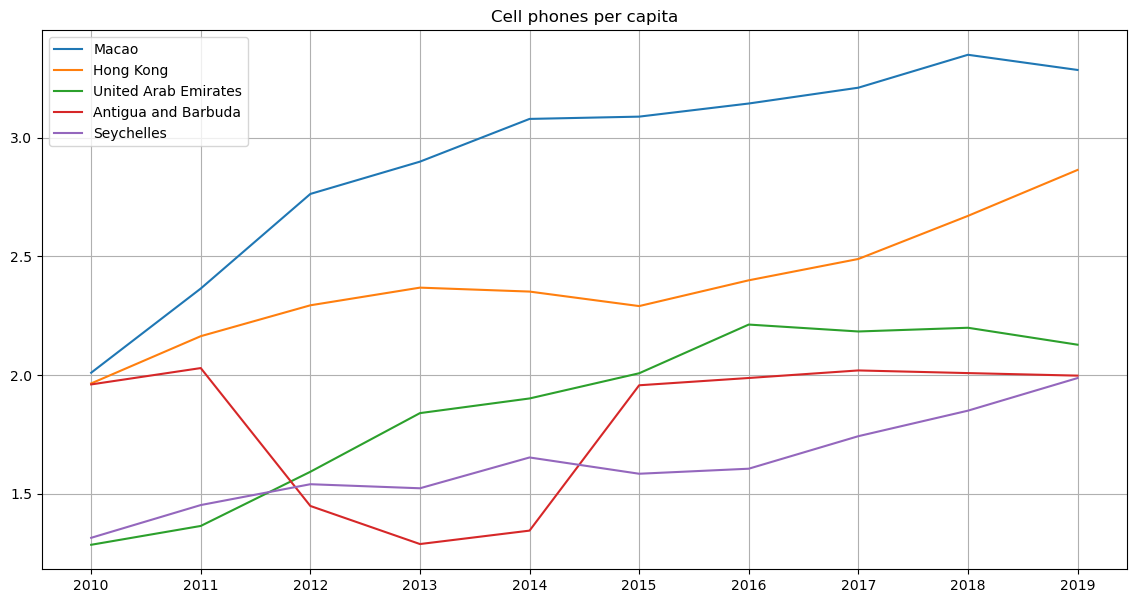

In [108]:
fig, axs = plt.subplots(figsize= (14,7))
axs.plot(x_years, y_M, label='Macao')
axs.plot(x_years, y_HK, label='Hong Kong')
axs.plot(x_years, y_UAE, label='United Arab Emirates')
axs.plot(x_years, y_AaB, label='Antigua and Barbuda')
axs.plot(x_years, y_S, label='Seychelles')
axs.set_title('Cell phones per capita')
axs.grid()
axs.legend();

In [109]:
#  = merged_second_table_df.pivot(index='year', columns='name', values='phones_per_capita')

In [110]:
# pivoted_merged_second_table_df.tail()

In [111]:
single_indexed_merged_second_table_df = merged_second_table_df.set_index('year')

In [112]:
single_indexed_merged_second_table_df.tail()

,phones_per_capita,name
year,,
2019,0.585168,Samoa
2019,0.484995,Yemen
2019,1.669907,South Africa
2019,0.935775,Zambia
2019,0.859677,Zimbabwe


In [113]:
indexed_merged_second_table_df = merged_second_table_df.set_index(['year', 'name'])

In [114]:
indexed_merged_second_table_df

phones_per_capita
year name                           
1960 Aruba                  0.000000
     Afghanistan            0.000000
     Angola                 0.000000
     Albania                0.000000
     Andorra                0.000000
...                              ...
2019 Samoa                  0.585168
     Yemen                  0.484995
     South Africa           1.669907
     Zambia                 0.935775
     Zimbabwe               0.859677

[11902 rows x 1 columns]

In [115]:
indexed_merged_second_table_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11902 entries, ('1960', 'Aruba') to ('2019', 'Zimbabwe')
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phones_per_capita  11902 non-null  float64
dtypes: float64(1)
memory usage: 140.2+ KB


In [116]:
unstacked_indexed_merged_second_table_df = indexed_merged_second_table_df.unstack()

In [117]:
unstacked_indexed_merged_second_table_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 1960 to 2019
Columns: 213 entries, ('phones_per_capita', 'Afghanistan') to ('phones_per_capita', 'Zimbabwe')
dtypes: float64(213)
memory usage: 93.6+ KB


In [118]:
unstacked_indexed_merged_second_table_df.columns.names # hur få fram "phones_per_capita" ? values ?

FrozenList([None, 'name'])

In [119]:
unstacked_indexed_merged_second_table_df.columns.names = ['Col-level 0','Country name'] # hur få fram "phones_per_capita" ? values ?

In [120]:
unstacked_indexed_merged_second_table_df.columns.names # hur få fram "phones_per_capita" ? values ?

FrozenList(['Col-level 0', 'Country name'])

In [121]:
unstacked_indexed_merged_second_table_df.values # hur få fram "phones_per_capita" ? values ?

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.67053053, 1.2632867 , 1.11336523, ..., 0.51274557, 0.77465361,
        0.95586085],
       [0.59967099, 0.9454447 , 1.12576602, ..., 0.4969063 , 0.86903414,
        0.85701849],
       [0.59836642, 0.921452  , 1.10290585, ..., 0.4849954 , 0.9357755 ,
        0.85967678]], shape=(56, 213))

In [122]:
interesting_years = ['2015', '2016', '2017', '2018', '2019']

In [123]:
# interesting_countries = ['Macao', 'Hong Kong', 'United Arab Emirates', 'Antigua and Barbuda', 'Seychelles']

In [124]:
interesting_countries = [('phones_per_capita' , 'Macao'), ('phones_per_capita' ,'Hong Kong') , 
                         ('phones_per_capita' ,'United Arab Emirates') , ('phones_per_capita' ,'Antigua and Barbuda') , 
                         ('phones_per_capita' ,'Seychelles')]

In [125]:
# part_interesting_countries = ['Macao',  'Seychelles']

In [126]:
unstacked_indexed_merged_second_table_df.loc[interesting_years , ('phones_per_capita' , 'Macao')]

year
2015    3.088231
2016    3.143510
2017    3.210102
2018    3.348741
2019    3.284849
Name: (phones_per_capita, Macao), dtype: float64

In [127]:
unstacked_indexed_merged_second_table_df.loc[interesting_years , interesting_countries]

Col-level 0  phones_per_capita                                 \
Country name             Macao Hong Kong United Arab Emirates   
year                                                            
2015                  3.088231  2.290401             2.007424   
2016                  3.143510  2.398931             2.212521   
2017                  3.210102  2.488773             2.183431   
2018                  3.348741  2.670209             2.199084   
2019                  3.284849  2.863650             2.127739   

Col-level 0                                  
Country name Antigua and Barbuda Seychelles  
year                                         
2015                    1.956838   1.584260  
2016                    1.987545   1.605459  
2017                    2.019337   1.742433  
2018                    2.008164   1.849900  
2019                    1.997460   1.987196

In [128]:
resetted_unstacked_indexed_merged_second_table_df =\
unstacked_indexed_merged_second_table_df.loc[interesting_years , interesting_countries].reset_index(col_level=1, col_fill='phones_per_capita')

In [129]:
resetted_unstacked_indexed_merged_second_table_df 

Col-level 0  phones_per_capita                                           \
Country name              year     Macao Hong Kong United Arab Emirates   
0                         2015  3.088231  2.290401             2.007424   
1                         2016  3.143510  2.398931             2.212521   
2                         2017  3.210102  2.488773             2.183431   
3                         2018  3.348741  2.670209             2.199084   
4                         2019  3.284849  2.863650             2.127739   

Col-level 0                                  
Country name Antigua and Barbuda Seychelles  
0                       1.956838   1.584260  
1                       1.987545   1.605459  
2                       2.019337   1.742433  
3                       2.008164   1.849900  
4                       1.997460   1.987196

In [130]:
resetted_unstacked_indexed_merged_second_table_df.columns

MultiIndex([('phones_per_capita',                 'year'),
            ('phones_per_capita',                'Macao'),
            ('phones_per_capita',            'Hong Kong'),
            ('phones_per_capita', 'United Arab Emirates'),
            ('phones_per_capita',  'Antigua and Barbuda'),
            ('phones_per_capita',           'Seychelles')],
           names=['Col-level 0', 'Country name'])

In [131]:
resetted_unstacked_indexed_merged_second_table_df.index.nlevels

1

In [132]:
resetted_unstacked_indexed_merged_second_table_df.columns.nlevels

2

In [133]:
resetted_unstacked_indexed_merged_second_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   (phones_per_capita, year)                  5 non-null      object 
 1   (phones_per_capita, Macao)                 5 non-null      float64
 2   (phones_per_capita, Hong Kong)             5 non-null      float64
 3   (phones_per_capita, United Arab Emirates)  5 non-null      float64
 4   (phones_per_capita, Antigua and Barbuda)   5 non-null      float64
 5   (phones_per_capita, Seychelles)            5 non-null      float64
dtypes: float64(5), object(1)
memory usage: 372.0+ bytes


In [134]:
reduced_resetted_unstacked_indexed_merged_second_table_df = resetted_unstacked_indexed_merged_second_table_df.copy()

In [135]:
reduced_resetted_unstacked_indexed_merged_second_table_df = resetted_unstacked_indexed_merged_second_table_df.loc[:,]

In [136]:
reduced_resetted_unstacked_indexed_merged_second_table_df

Col-level 0  phones_per_capita                                           \
Country name              year     Macao Hong Kong United Arab Emirates   
0                         2015  3.088231  2.290401             2.007424   
1                         2016  3.143510  2.398931             2.212521   
2                         2017  3.210102  2.488773             2.183431   
3                         2018  3.348741  2.670209             2.199084   
4                         2019  3.284849  2.863650             2.127739   

Col-level 0                                  
Country name Antigua and Barbuda Seychelles  
0                       1.956838   1.584260  
1                       1.987545   1.605459  
2                       2.019337   1.742433  
3                       2.008164   1.849900  
4                       1.997460   1.987196

In [137]:
test_reduced_resetted_unstacked_indexed_merged_second_table_df = reduced_resetted_unstacked_indexed_merged_second_table_df.set_index('phones_per_capita')

In [138]:
test_reduced_resetted_unstacked_indexed_merged_second_table_df # Inge bra

phones_per_capita
"(2015, 3.0882307526018344, 2.290400888730405, 2.0074243299155907, 1.9568383718215274, 1.5842601612091758)"
"(2016, 3.1435100081699345, 2.398931385110269, 2.212521470630779, 1.9875447197561946, 1.6054585591009431)"
"(2017, 3.2101019559699284, 2.4887734675106854, 2.1834311539896802, 2.0193373500587146, 1.742432937199378)"
"(2018, 3.3487406123894186, 2.670209054558141, 2.1990840650758208, 2.008163621679436, 1.8498997540356752)"
"(2019, 3.284849160630631, 2.8636502883629245, 2.127738798785061, 1.9974597522715676, 1.9871959026888604)"


In [139]:
test_reduced_resetted_unstacked_indexed_merged_second_table_df.reset_index(drop=True) # Inge bra

0
1
2
3
4



#### The second table


In [140]:
# code above needs finish

In [141]:
# unstacked_reduced_second_table = reduced_second_table.unstack()

In [142]:
# unstacked_reduced_second_table.tail(10)

In [143]:
# reduced_second_table.drop(columns=[reduced_second_table['n_cellphones'], reduced_second_table['population']]])


#### Plot of growth rates


In [144]:
y_years = ['2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019']

In [145]:
y_M = unstacked_indexed_merged_second_table_df.loc[ y_years, ('phones_per_capita' , 'Macao')]

In [146]:
type(y_M)

pandas.core.series.Series

In [147]:
y_M.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 2010 to 2019
Series name: ('phones_per_capita', 'Macao')
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 160.0+ bytes


In [148]:
y_M

year
2010    2.009700
2011    2.364261
2012    2.762687
2013    2.898678
2014    3.078619
2015    3.088231
2016    3.143510
2017    3.210102
2018    3.348741
2019    3.284849
Name: (phones_per_capita, Macao), dtype: float64

In [149]:
y_M.index

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object', name='year')

In [150]:
y_M.values

array([2.00970039, 2.36426078, 2.76268691, 2.89867773, 3.07861899,
       3.08823075, 3.14351001, 3.21010196, 3.34874061, 3.28484916])

In [151]:
y_HK = unstacked_indexed_merged_second_table_df.loc[ y_years, ('phones_per_capita' ,'Hong Kong')]

In [152]:
y_UAE =   unstacked_indexed_merged_second_table_df.loc[ y_years, ('phones_per_capita' ,'United Arab Emirates')]

In [153]:
y_AaB =  unstacked_indexed_merged_second_table_df.loc[ y_years, ('phones_per_capita' ,'Antigua and Barbuda')]

In [154]:
y_S = unstacked_indexed_merged_second_table_df.loc[ y_years, ('phones_per_capita' ,'Seychelles')]

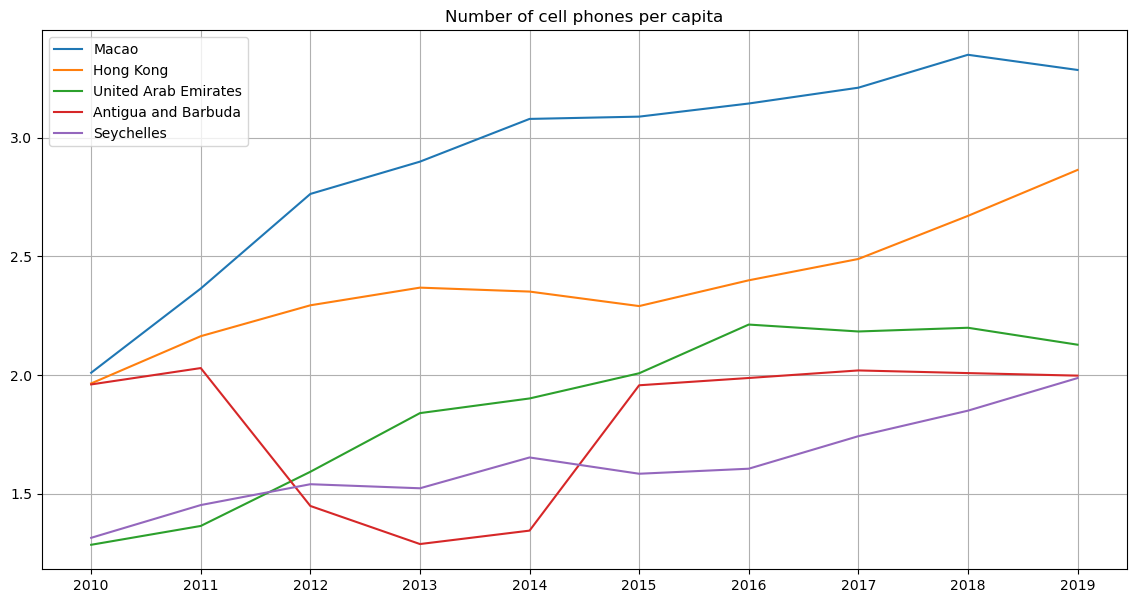

In [155]:
fig, axs = plt.subplots(figsize= (14,7))
axs.plot(y_M.index, y_M.values, label='Macao')
axs.plot(y_M.index, y_HK.values, label='Hong Kong')
axs.plot(y_M.index, y_UAE.values, label='United Arab Emirates')
axs.plot(y_M.index, y_AaB.values, label='Antigua and Barbuda')
axs.plot(y_M.index, y_S.values, label='Seychelles')
axs.set_title('Number of cell phones per capita')
axs.grid()
axs.legend();


#### Old code, remove ??


For **pop_data_df** it seems that we only need data for the years 1960 and 2010-2019, for a few countries. These countries are ABW, AFG, AGO, ALB, AND, Macao, Hong Kong, United Arab Emirates,	Antigua and Barbuda, and Seychelles.

There are some null values in pop_data_df. We have to check if any of these concerns the years and countries we will treat.

First, we will get the alpha-3 codes for the names.

In [156]:
alpha_3_codes = name_strings_country_data_df['name'].isin(['Macao', 'Hong Kong', 'United Arab Emirates','Antigua and Barbuda', 'Seychelles'])

In [157]:
name_strings_country_data_df[alpha_3_codes]

,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
alpha-3,,,,,,,,,,
ATG,Antigua and Barbuda,AG,28,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
HKG,Hong Kong,HK,344,ISO 3166-2:HK,Asia,Eastern Asia,NaN,142.0,30.0,NaN
MAC,Macao,MO,446,ISO 3166-2:MO,Asia,Eastern Asia,NaN,142.0,30.0,NaN
SYC,Seychelles,SC,690,ISO 3166-2:SC,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
ARE,United Arab Emirates,AE,784,ISO 3166-2:AE,Asia,Western Asia,NaN,142.0,145.0,NaN


Now we can select the interesting rows in pop_data_df.

In [158]:
interesting_countries_bool = pop_data_df.index.isin(['ATG','HKG','MAC','SYC','ARE','ABW', 'AFG', 'AGO', 'ALB', 'AND'])

In [159]:
interesting_years = ['1960', '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

Make a deep copy of pop_data_df and then choose the interesting countries

In [160]:
interesting_countries_df = pop_data_df[interesting_countries_bool].copy()

In [161]:
interesting_countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, ABW to SYC
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     int64  
 1   1960        10 non-null     float64
 2   1961        10 non-null     float64
 3   1962        10 non-null     float64
 4   1963        10 non-null     float64
 5   1964        10 non-null     float64
 6   1965        10 non-null     float64
 7   1966        10 non-null     float64
 8   1967        10 non-null     float64
 9   1968        10 non-null     float64
 10  1969        10 non-null     float64
 11  1970        10 non-null     float64
 12  1971        10 non-null     float64
 13  1972        10 non-null     float64
 14  1973        10 non-null     float64
 15  1974        10 non-null     float64
 16  1975        10 non-null     float64
 17  1976        10 non-null     float64
 18  1977        10 non-null     float64
 19  1978        10 non-null     float

Make a deep copy of interesting_countries_df

In [162]:
interesting_countries_and_years_df = interesting_countries_df[interesting_years].copy()

In [163]:
interesting_countries_and_years_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, ABW to SYC
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    10 non-null     float64
 1   2010    10 non-null     float64
 2   2011    10 non-null     float64
 3   2012    10 non-null     float64
 4   2013    10 non-null     float64
 5   2014    10 non-null     float64
 6   2015    10 non-null     float64
 7   2016    10 non-null     float64
 8   2017    10 non-null     float64
 9   2018    10 non-null     float64
 10  2019    10 non-null     float64
dtypes: float64(11)
memory usage: 960.0+ bytes


In [164]:
interesting_countries_and_years_df

,1960,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
iso-3,,,,,,,,,,,
ABW,54608.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0
AFG,8622466.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0
AGO,5357195.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0
ALB,1608800.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
AND,9443.0,71519.0,70567.0,71013.0,71367.0,71621.0,71746.0,72540.0,73837.0,75013.0,76343.0
ARE,133426.0,8481771.0,8575205.0,8664969.0,8751847.0,8835951.0,8916899.0,8994263.0,9068296.0,9140169.0,9211657.0
ATG,55342.0,85695.0,86729.0,87674.0,88497.0,89236.0,89941.0,90564.0,91119.0,91626.0,92117.0
HKG,3114671.0,7024200.0,7071600.0,7150100.0,7178900.0,7229500.0,7291300.0,7336600.0,7393200.0,7452600.0,7507900.0
MAC,177014.0,557297.0,571003.0,582766.0,593374.0,604167.0,615239.0,626688.0,638609.0,650991.0,663653.0


Set a name for all the columns

In [165]:
interesting_countries_and_years_df.columns.name = 'year'

In [166]:
interesting_countries_and_years_df

year,1960,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
iso-3,,,,,,,,,,,
ABW,54608.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0
AFG,8622466.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0
AGO,5357195.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0
ALB,1608800.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
AND,9443.0,71519.0,70567.0,71013.0,71367.0,71621.0,71746.0,72540.0,73837.0,75013.0,76343.0
ARE,133426.0,8481771.0,8575205.0,8664969.0,8751847.0,8835951.0,8916899.0,8994263.0,9068296.0,9140169.0,9211657.0
ATG,55342.0,85695.0,86729.0,87674.0,88497.0,89236.0,89941.0,90564.0,91119.0,91626.0,92117.0
HKG,3114671.0,7024200.0,7071600.0,7150100.0,7178900.0,7229500.0,7291300.0,7336600.0,7393200.0,7452600.0,7507900.0
MAC,177014.0,557297.0,571003.0,582766.0,593374.0,604167.0,615239.0,626688.0,638609.0,650991.0,663653.0


Tests

In [167]:
test_stack_df = interesting_countries_and_years_df.stack()

In [168]:
test_stack_df

iso-3  year
ABW    1960     54608.0
       2010    100341.0
       2011    101288.0
       2012    102112.0
       2013    102880.0
                 ...   
SYC    2015     93419.0
       2016     94677.0
       2017     95843.0
       2018     96762.0
       2019     97625.0
Length: 110, dtype: float64

In [169]:
type(test_stack_df)

pandas.core.series.Series

In [170]:
test_stack_df.index

MultiIndex([('ABW', '1960'),
            ('ABW', '2010'),
            ('ABW', '2011'),
            ('ABW', '2012'),
            ('ABW', '2013'),
            ('ABW', '2014'),
            ('ABW', '2015'),
            ('ABW', '2016'),
            ('ABW', '2017'),
            ('ABW', '2018'),
            ...
            ('SYC', '2010'),
            ('SYC', '2011'),
            ('SYC', '2012'),
            ('SYC', '2013'),
            ('SYC', '2014'),
            ('SYC', '2015'),
            ('SYC', '2016'),
            ('SYC', '2017'),
            ('SYC', '2018'),
            ('SYC', '2019')],
           names=['iso-3', 'year'], length=110)


##### We see that there are no null values to handle for the countries and years we are interested in.



##### Handle cleaned_cell_phones_total_data_df the same way


We will choose the same countries and years as above, for the data on cell phones.

In [171]:
# interesting_countries_cell_phones_bool = cleaned_cell_phones_total_data_df.index.isin(['ATG','HKG','MAC','SYC','ARE','ABW', 'AFG', 'AGO', 'ALB', 'AND'])

In [172]:
# interesting_countries_cell_phones_df = cleaned_cell_phones_total_data_df[interesting_countries_cell_phones_bool].copy()

In [173]:
# interesting_countries_cell_phones_df.info()

In [174]:
# interesting_countries_and_years_cell_phones_df = interesting_countries_cell_phones_df[interesting_years].copy()

In [175]:
# interesting_countries_and_years_cell_phones_df.columns

In [176]:
# interesting_countries_and_years_cell_phones_df.columns.name = 'year'

In [177]:
# interesting_countries_and_years_cell_phones_df.columns

In [178]:
# interesting_countries_and_years_cell_phones_df.info()

In [179]:
# interesting_countries_and_years_cell_phones_df


#### Stacking and joining data frames


The data frames interesting_countries_and_years_df and interesting_countries_and_years_cell_phones_df are in wide format. To make it easier to join them on index and year, it would be good to stack them, to long format.


##### Stack interesting_countries_and_years_df


In [180]:
# stacked_interesting_countries_and_years_df = interesting_countries_and_years_df.stack()

In [181]:
# stacked_interesting_countries_and_years_df.info()

Give a name to the Series

In [182]:
# stacked_interesting_countries_and_years_df.name = 'population'

In [183]:
# stacked_interesting_countries_and_years_df.info()

In [184]:
# stacked_interesting_countries_and_years_df

In [185]:
# stacked_interesting_countries_and_years_df['ABW']


##### Stack interesting_countries_and_years_cell_phones_df


In [186]:
# stacked_interesting_countries_and_years_cell_phones_df = interesting_countries_and_years_cell_phones_df.stack()

In [187]:
# stacked_interesting_countries_and_years_cell_phones_df.info()

Give a name to the Series

In [188]:
# stacked_interesting_countries_and_years_cell_phones_df.name = 'n_cellphones'

In [189]:
# stacked_interesting_countries_and_years_cell_phones_df.info()

In [190]:
# stacked_interesting_countries_and_years_cell_phones_df

In [191]:
# stacked_interesting_countries_and_years_cell_phones_df['ABW']


##### Join stacked_interesting_countries_and_years_cell_phones_df and stacked_interesting_countries_and_years_df


Now we can join the two stacked data frames on the multiindex [iso-3, year]

It is easier to join data frames than Series, so we create Data Frames from the Series stacked_interesting_countries_and_years_cell_phones_df and stacked_interesting_countries_and_years_df (which have gotten misleading names).

In [192]:
#  = pd.DataFrame(data=stacked_interesting_countries_and_years_cell_phones_df)

In [193]:
# n_cellphones_df

In [194]:
# population_df = pd.DataFrame(data=stacked_interesting_countries_and_years_df)

In [195]:
# population_df

In [196]:
# n_cellphones_and_population_df = n_cellphones_df.merge(population_df, on=['iso-3','year'] , copy=True)

In [197]:
# n_cellphones_and_population_df

In [198]:
# type(n_cellphones_and_population_df)

##### Now we can show the first table required in the assignment.

First we unstack the data frame two levels.

In [199]:
# unstacked_n_cellphones_and_population_df = n_cellphones_and_population_df.unstack(level=-1)

In [200]:
# unstacked_n_cellphones_and_population_df

In [201]:
# n_cellphones_and_population_df.index

In [202]:
# first_table_1960_df = n_cellphones_and_population_df.xs('1960', level = 'year')

In [203]:
# first_table_1960_df 

In [204]:
# first_table_1960_df.info()

In [205]:
# df.loc[(slice(None), "one"), :]

Another subset

In [206]:
# first_table_1960_df_II = n_cellphones_and_population_df.loc[(slice(None), "1960"), :]


#### The first table


In [207]:
# first_table_1960_df_II.head()


##### The second table


We have to compute the number of cell phones per capita for the different countries. First a deep copy.

In [208]:
# n_cellphones_and_population_and_per_capita_df = n_cellphones_and_population_df.copy()

In [209]:
# n_cellphones_and_population_and_per_capita_df['phones_per_capita'] = n_cellphones_and_population_and_per_capita_df['n_cellphones'] / n_cellphones_and_population_and_per_capita_df['population'] 

In [210]:
# n_cellphones_and_population_and_per_capita_df.info()

In [211]:
# n_cellphones_and_population_and_per_capita_df

In the second table we are only interested in the column phones_per_capita, so we choose a subset.

In [212]:
# phones__per_capita_Series = n_cellphones_and_population_and_per_capita_df['phones_per_capita'].copy()

In [213]:
# phones__per_capita_Series.info()

This is a Series, so we convert it to a DataFrame.

In [214]:
# phones__per_capita_df = pd.DataFrame(data=phones__per_capita_Series)

In [215]:
# phones__per_capita_df.info()

In [216]:
# phones__per_capita_df

We want the country names and not the iso-3 codes, so we make a left join. First though, we make an unstack.

In [217]:
# unstacked_phones_per_capita_df = phones__per_capita_df.unstack(level=-1)

In [218]:
# unstacked_phones_per_capita_df.info()

In [219]:
# unstacked_phones_per_capita_df

In [220]:
# unstacked_phones_per_capita_df.columns

We will not need the column for 1960, so we delete it.

In [221]:
# years_unstacked_phones_per_capita_df = unstacked_phones_per_capita_df.drop(axis=1, columns=('phones_per_capita','1960'))

In [222]:
# years_unstacked_phones_per_capita_df

We are only interested in the last five countries.

In [223]:
# countries_and_years_unstacked_phones_per_capita_df = years_unstacked_phones_per_capita_df.tail().copy()

In [224]:
# countries_and_years_unstacked_phones_per_capita_df.info()


#### The second table


Time ran out to do more than this, for the first part of the assignment.

In [225]:
# countries_and_years_unstacked_phones_per_capita_df

Now we can choose the relevant column from name_strings_country_data_df

In [226]:
# relevant_name_strings_country_data_Series = name_strings_country_data_df['name'].copy()

In [227]:
# relevant_name_strings_country_data_Series.info()

Convert to data frame

In [228]:
# relevant_name_strings_country_data_df = pd.DataFrame(data=relevant_name_strings_country_data_Series)

In [229]:
# relevant_name_strings_country_data_df.info()

Time to join 


## SQL


Connect to the database and look at the data

In [230]:
conn = sql.connect("./user_actions.db")
cursor = conn.cursor()

In [231]:
tables = list(cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"))
tables

[('user_actions',)]

In [232]:
views = list(cursor.execute("SELECT name FROM sqlite_master WHERE type='view';"))
views

[]

In [233]:
# SELECT

query = """
SELECT * 
FROM user_actions
"""

cursor.execute(query)

for data in cursor.fetchone():    
    print(data)
user_action_pd = pd.read_sql_query(query, conn)

34
user34
user34@email.com
signup
2015-02-04 14:38:47
None


In [234]:
user_action_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    8040 non-null   int64 
 1   username   8040 non-null   object
 2   email      8040 non-null   object
 3   action     8040 non-null   object
 4   timestamp  8040 non-null   object
 5   day        0 non-null      object
dtypes: int64(1), object(5)
memory usage: 377.0+ KB



#### Users who have "signedup"


In [235]:
query = """
SELECT username 
FROM user_actions
WHERE action='signup'
"""

cursor.execute(query)

# for data in cursor.fetchall():    
#    print(data)

pd.read_sql_query(query, conn).sort_values(by='username')

,username
2,user1
18,user10
20,user11
22,user12
15,user13
26,user14
4,user15
11,user16
12,user17
6,user18



#### Total number of log entries for each user


In [236]:
query = """
SELECT user_id, username, count(*) 
FROM user_actions
WHERE action='login'
GROUP BY username
"""

cursor.execute(query)

# for data in cursor.fetchall():  
#     print(data)

pd.read_sql_query(query, conn).sort_values(by='username')

,user_id,username,count(*)
0,1,user1,97
1,10,user10,163
2,11,user11,319
3,12,user12,202
4,13,user13,464
5,14,user14,311
6,15,user15,30
7,16,user16,370
8,17,user17,356
9,18,user18,116



#### Users who have logged in and signed up on the same day


Create two views, for signup and login, with new column, 'day', from 'timestamp'.

In [237]:
query = """
SELECT *
FROM user_actions
"""

#cursor.execute(query)

# for data in cursor.fetchall():
# for data in cursor.fetchone():    
#    print(data)

In [238]:
query = """
CREATE VIEW login_view 
 (user_id, login_username, login_day)  
AS SELECT user_id, username, date(timestamp)
FROM user_actions
WHERE action='login' 
GROUP BY username, date(timestamp);
"""
cursor.execute(query);

#for data in cursor.fetchone():
# for data in cursor.fetchone():    
#    print(data)
# pd.read_sql_query(query, conn)
#pd.read_sql_query(query, conn).sort_values(by='username')

In [239]:
query = """
CREATE VIEW signup_view 
  (user_id, signup_username, signup_day) 
AS SELECT user_id, username, date(timestamp)
FROM user_actions
WHERE action='signup' 
GROUP BY username, date(timestamp);
"""
cursor.execute(query);

# for data in cursor.fetchone():
# for data in cursor.fetchone():    
#    print(data)
# pd.read_sql_query(query, conn)
# pd.read_sql_query(query, conn).sort_values(by='username')


##### Users who have signed up and logged in the same day.


In [240]:
query = """
SELECT signup_view.user_id, signup_username, signup_day
FROM signup_view, login_view
WHERE signup_username = login_username
      AND signup_day = login_day
GROUP BY login_username
"""
cursor.execute(query)
# for data in cursor.fetchone():
# for data in cursor.fetchone():    
#    print(data)
# pd.read_sql_query(query, conn)
pd.read_sql_query(query, conn).sort_values(by='signup_day')

,user_id,signup_username,signup_day
7,8,user8,2018-04-15
0,12,user12,2020-05-07
3,30,user30,2021-11-15
6,7,user7,2021-12-19
2,22,user22,2022-07-27
5,5,user5,2022-08-19
1,2,user2,2022-11-05
4,32,user32,2022-11-28


Cleaning up by dropping the views.

In [241]:
query = """
DROP VIEW login_view
"""
cursor.execute(query);
#AND login_view.date(timestamp) = signup_view.date(timestamp) 
# WHERE login_view.username = signup_view.username 
# GROUP BY username
#for data in cursor.fetchone():
# for data in cursor.fetchone():    
#   print(data)
# pd.read_sql_query(query, conn)
# pd.read_sql_query(query, conn).sort_values(by='username')

In [242]:
query = """
DROP VIEW signup_view
"""
cursor.execute(query);

In [243]:
query = """
SELECT user_id, username, action, date(timestamp)
FROM user_actions
WHERE username='user1' AND (action='login' OR action='signup')
GROUP BY date(timestamp)
"""
# cursor.execute(query)

# for data in cursor.fetchall():
# for data in cursor.fetchone():    
#    print(data)
# pd.read_sql_query(query, conn)
# pd.read_sql_query(query, conn).sort_values(by='username')

In [244]:
query = """
SELECT user_id, username, day
FROM user_actions
WHERE action='login' OR action='signup'
GROUP BY day
"""

# cursor.execute(query)

# for data in cursor.fetchone():
# for data in cursor.fetchone():    
#     print(data)
# pd.read_sql_query(query, conn)
# pd.read_sql_query(query, conn).sort_values(by='username')


## Regex



#### Read data from file


In [245]:
first_part = r"^\d{1,3}\." # split each line at the beginning number, which will not be saved

In [246]:
comments_pd = pd.read_table('comments.txt', sep=first_part, names=['id', 'comment'], engine='python')

In [247]:
comments_pd['comment'].head() # show the first five comments

0            "Great post! #programming #tips"
1      "Enjoyed the article. #coding #python"
2         "Interesting insights. #tech #data"
3     "This is awesome! #programming #coding"
4       "Thanks for sharing. #data #analysis"
Name: comment, dtype: object

In [248]:
# comments_pd.info()

In [249]:
# comments_pd.head()

In [250]:
comments_pd.dtypes

id         float64
comment     object
dtype: object


##### Drop the 'id' column and convert the comments to strings


This will create a Series of strings.

In [251]:
string_comments = comments_pd['comment'].astype({'comment' : 'string'}, copy=True)

In [252]:
# string_comments.info()

In [253]:
string_comments.head(6) # show the first six comments

0                  "Great post! #programming #tips"
1            "Enjoyed the article. #coding #python"
2               "Interesting insights. #tech #data"
3           "This is awesome! #programming #coding"
4             "Thanks for sharing. #data #analysis"
5     "I learned a lot. #programming #python #tips"
Name: comment, dtype: string

In [254]:
# string_comments.tail()

In [255]:
# string_comments[99]

In [256]:
# string_comments[97]

In [257]:
# string_comments[1]


#### Solve tasks



##### All hashtags


In [258]:
pattern_all_hashtags = r"[#]{1}[\w]+"
pattern_all_hashtags

'[#]{1}[\\w]+'

In [259]:
# tag_comment_1 = re.findall(pattern_all_hashtags, string_comments[1]) # the second comment
# print(tag_comment_1)


###### All hashtags are found in the first comment


In [260]:
tag_comment_0 = re.findall(pattern_all_hashtags, string_comments[0])
print(tag_comment_0)

['#programming', '#tips']



##### Both #programming and #python


In [261]:
# pattern_both_test = r"[#programming]+ och [#python]+"
# pattern_both_test

In [262]:
pattern_both = r"[#p]{1}[\w]+[o]{1}[\w]*[n]{1}[\w]*"
pattern_both

'[#p]{1}[\\w]+[o]{1}[\\w]*[n]{1}[\\w]*'

In [263]:
# both_tag_comment_0 = re.findall(pattern_both, string_comments[0])
# print(both_tag_comment_0)


###### In the second comment, #python is found, but not #programming


In [264]:
both_tag_comment_1 = re.findall(pattern_both, string_comments[1])
print(both_tag_comment_1)

['#coding', '#python']



###### To find both #python and #programming, we have to search in the sixth comment


In [265]:
both_tag_comment_5 = re.findall(pattern_both, string_comments[5])
print(both_tag_comment_5)

['#programming', '#python']


We see that this patterna finds both #programming och #python, if they exist in a comment. It also finds some other tags, e.g. #coding, but it was not required in the assignment that no other tags should be found.


##### All unique hash tags


In [266]:
all_tags = []
for i in range(99):
    all_tags.append(re.findall(pattern_all_hashtags, string_comments[i]))

In [267]:
all_tags[:5]

[['#programming', '#tips'],
 ['#coding', '#python'],
 ['#tech', '#data'],
 ['#programming', '#coding'],
 ['#data', '#analysis']]

In [268]:
type(all_tags)

list

In [269]:
#len(all_tags)

This is a list of lists. In python it is possible to transform it to a set, where all duplicates will disappear. As it is required to do everything with regex, I will not continue.


##### Från kurs_demo


In [270]:
string = "Please contact support@example.com for assistance. For general inquiries, you can email info@company.com and @gmail.com"
print(string)

Please contact support@example.com for assistance. For general inquiries, you can email info@company.com and @gmail.com


In [271]:
pattern = r"\b[\w._%+-]+@[\w.-]+\.[A-Za-z]{2,4}\b"
r"\b[\w._%+-]+@[\w.-]+\.[A-Za-z]{2,4}\b"

'\\b[\\w._%+-]+@[\\w.-]+\\.[A-Za-z]{2,4}\\b'

In [272]:
emails = re.findall(pattern, string)
print(emails)

['support@example.com', 'info@company.com']
